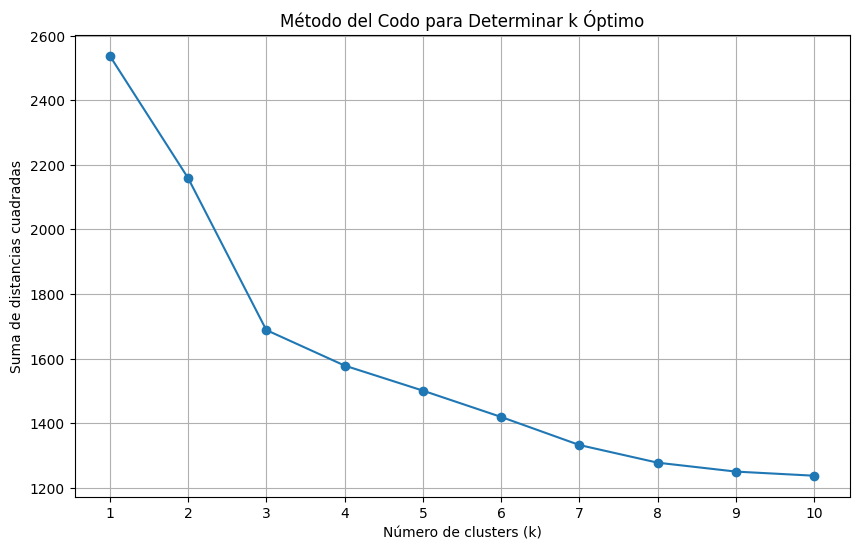

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

df = pd.read_csv("../df_full.csv")
df.drop(columns=["nobeyesdad"], inplace=True)

# Crear un pipeline que incluye la normalización de los datos y el modelo K-means
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('kmeans', KMeans(random_state=42))
])

# Función para calcular la suma de distancias cuadradas (inercia) para diferentes valores de k
def calcular_ssd(X, max_k=10):
    ssd = []
    for k in range(1, max_k+1):
        pipeline.set_params(kmeans__n_clusters=k)
        pipeline.fit(X)
        ssd.append(pipeline.named_steps['kmeans'].inertia_)
    return ssd

# Calcular la inercia para un rango de valores de k
ssd = calcular_ssd(df, max_k=10)

# Graficar el método del codo para encontrar el k óptimo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), ssd, marker='o')
plt.title('Método del Codo para Determinar k Óptimo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Suma de distancias cuadradas')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [10]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])

# Ajustar el pipeline a los datos
pipeline.fit(df)

# Extraer las etiquetas de los clusters
labels = pipeline.named_steps['kmeans'].labels_

# Añadir las etiquetas de clusters al DataFrame original
df['Cluster'] = labels

# Agrupar los datos por cluster y calcular estadísticas descriptivas
cluster_stats = df.groupby('Cluster').agg(['mean', 'std'])

# Crear DataFrame para la media
mean_df = cluster_stats.xs('mean', level=1, axis=1)

# Crear DataFrame para la desviación estándar
std_df = cluster_stats.xs('std', level=1, axis=1)


In [11]:
print("DataFrame de las Medias:")
mean_df

DataFrame de las Medias:


,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,bad_habits,calc,mtrans
Cluster,,,,,,,,,,,,,,,,,
0,1.000000,22.555556,171.967320,70.437908,0.00000,0.758170,2.240196,2.616209,1.124183,0.032680,2.080458,0.058824,1.282745,0.526471,0.967320,0.764706,1.745098
1,0.590763,24.809493,171.940346,95.878704,1.00000,0.957665,2.429686,2.725029,1.060295,0.019885,2.075895,0.011546,1.021046,0.659551,0.980115,0.755613,1.522771
2,0.000000,21.096698,161.238208,55.219811,0.42217,0.658019,2.439858,2.590684,1.462264,0.018868,1.704882,0.162736,1.047476,0.760071,0.981132,0.617925,1.908019


In [12]:
print("\nDataFrame de las Desviaciones Estándar:")
std_df


DataFrame de las Desviaciones Estándar:


,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,bad_habits,calc,mtrans
Cluster,,,,,,,,,,,,,,,,,
0,0.000000,6.204719,8.027435,12.353111,0.000000,0.429598,0.512534,0.958274,0.805575,0.178381,0.666371,0.236067,0.918491,0.588995,0.178381,0.570834,0.963337
1,0.491851,6.357877,8.467314,22.596673,0.000000,0.201417,0.513982,0.701578,0.322789,0.139648,0.588085,0.106864,0.834938,0.593092,0.139648,0.501531,0.933935
2,0.000000,5.104820,7.541366,10.711291,0.494489,0.474934,0.602722,0.953457,0.609996,0.136219,0.591118,0.369561,0.895637,0.673600,0.136219,0.532854,0.729994


In [13]:
mean_df.to_csv("mean_df.csv")
std_df.to_csv("std_df.csv")